<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/examples/intro/optimiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Rosenbrock function is a non-convex function commonly used for bench-marking optimisation methods. It is given by

$
f(x, y) = \left( 1 - x \right)^2 + 100 \left( y - x^2 \right)^2\,,
$

and has a global minima at $(x, y) = (1, 1)$. 

In this example we will benchmark several of the optimisers included with TensorFlow, including SGD, SGD + momentum, RMSprop and Adam, starting from (x, y) = (0, 1). Learning rates were chosen to be (approximately) the largest values possible and that converged to the true solution. 

In [0]:

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [54]:
print(tf.__version__)

2.1.0-rc1


In [0]:
def rosenbrock(x, y): 
	return (1 - x)**2 + 100 * (y - x**2)**2

In [0]:
def benchmark(f, opt, iterations, x_init, y_init):
  x = tf.Variable(x_init) 
  y = tf.Variable(y_init) 
  history = []
  for i in range(iterations):
    with tf.GradientTape() as tape:
      z = f(x, y)
    grads = tape.gradient(z, [x, y])
    history.append([x.numpy(), y.numpy(), grads[0].numpy(), grads[1].numpy()])
    processed_grads = [g for g in grads]
    grads_and_vars = zip(processed_grads, [x, y])
    opt.apply_gradients(grads_and_vars)
  return np.array(history)

In [0]:
iterations = 100
x_init = 0.0
y_init = 1.0

In [0]:
sgd_history = benchmark(rosenbrock, keras.optimizers.SGD(learning_rate=0.001), iterations, x_init, y_init)

In [0]:
momentum_history = benchmark(rosenbrock, keras.optimizers.SGD(learning_rate=0.001, nesterov=True, momentum=0.2), iterations, x_init, y_init)

In [0]:
rmsprop_history = benchmark(rosenbrock, keras.optimizers.RMSprop(learning_rate=0.01), iterations, x_init, y_init)

In [0]:
adam_history = benchmark(rosenbrock, keras.optimizers.Adam(learning_rate=0.05), iterations, x_init, y_init)

In [0]:
xx, yy = np.mgrid[-1:2:.01, -0.5:2:.01]
zz = rosenbrock(xx, yy)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


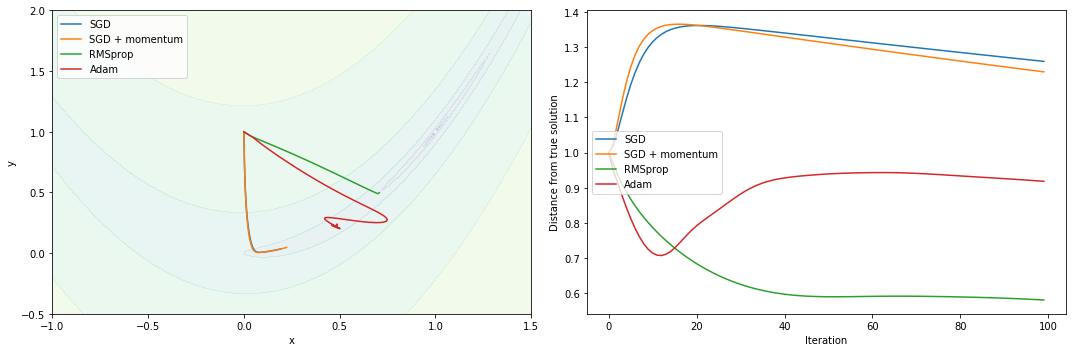

In [63]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
ax.contourf(xx, yy, np.log(zz), alpha=0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(sgd_history[:, 0], sgd_history[:, 1], label='SGD')
ax.plot(momentum_history[:, 0], momentum_history[:, 1], label='SGD + momentum')
ax.plot(rmsprop_history[:, 0], rmsprop_history[:, 1], label='RMSprop')
ax.plot(adam_history[:, 0], adam_history[:, 1], label='Adam')
ax.set_xlim([-1,1.5])
ax.set_ylim([-0.5,2])
ax.legend(loc='upper left')
ax = plt.subplot(1, 2, 2)
ax.set_xlabel('Iteration')
ax.set_ylabel('Distance from true solution')
ax.plot(((sgd_history[:, 0] - 1)**2 + (sgd_history[:, 1] - 1)**2)**0.5, label = 'SGD')
ax.plot(((momentum_history[:, 0] - 1)**2 + (momentum_history[:, 1] - 1)**2)**0.5, label = 'SGD + momentum')
ax.plot(((rmsprop_history[:, 0] - 1)**2 + (rmsprop_history[:, 1] - 1)**2)**0.5, label = 'RMSprop')
ax.plot(((adam_history[:, 0] - 1)**2 + (adam_history[:, 1] - 1)**2)**0.5, label = 'Adam')
ax.legend()
plt.tight_layout()
plt.show()
